# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [2]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [3]:
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from netCDF4 import Dataset

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### OPEN NETCDF FILE ###

In [4]:

data = Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation
lat =data.variables['latitude'][:]
lon = data.variables['longitude'][:]
time = data.variables['time'][:] # hours since 1900-01-01 00:00:0.0
dts = np.empty(len(time),dtype=datetime)

start = datetime(1900,1,1,0,0)
for i, t in enumerate(time):
    dts[i] =start +timedelta(hours=int(t))

tp = data.variables['tp'][:] * 1000
p10u = data.variables['p10u'][:]
p10v = data.variables['p10v'][:]
msl = data.variables['msl'][:]/100

ax.coastlines()

plt.show()



NameError: name 'ax' is not defined

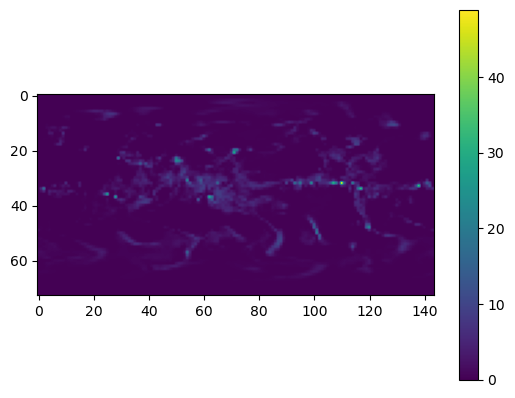

In [5]:
plt.imshow(msl[0])
plt.imshow(tp[7])
plt.colorbar()

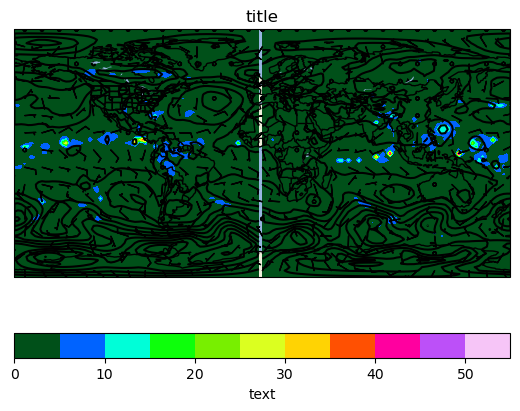

144
73


In [23]:
proj = ccrs.LambertConformal()
ax = plt.axes(projection=ccrs.PlateCarree())



plt.contour(lon, lat, msl[0], 10,
             transform=ccrs.PlateCarree(),colors='k')
plt.contourf(lon, lat, tp[1], 10,
             transform=ccrs.PlateCarree(),cmap='gist_ncar')
plt.barbs(lon[::5],lat[::5],p10u[0,::5,::5],p10v[0,::5,::5],transform =ccrs.PlateCarree(),length=4)
cb = plt.colorbar(orientation='horizontal')
cb.set_label('text')


ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

t = plt.title('title')
plt.show()
print(len(lon))
print(len(lat))

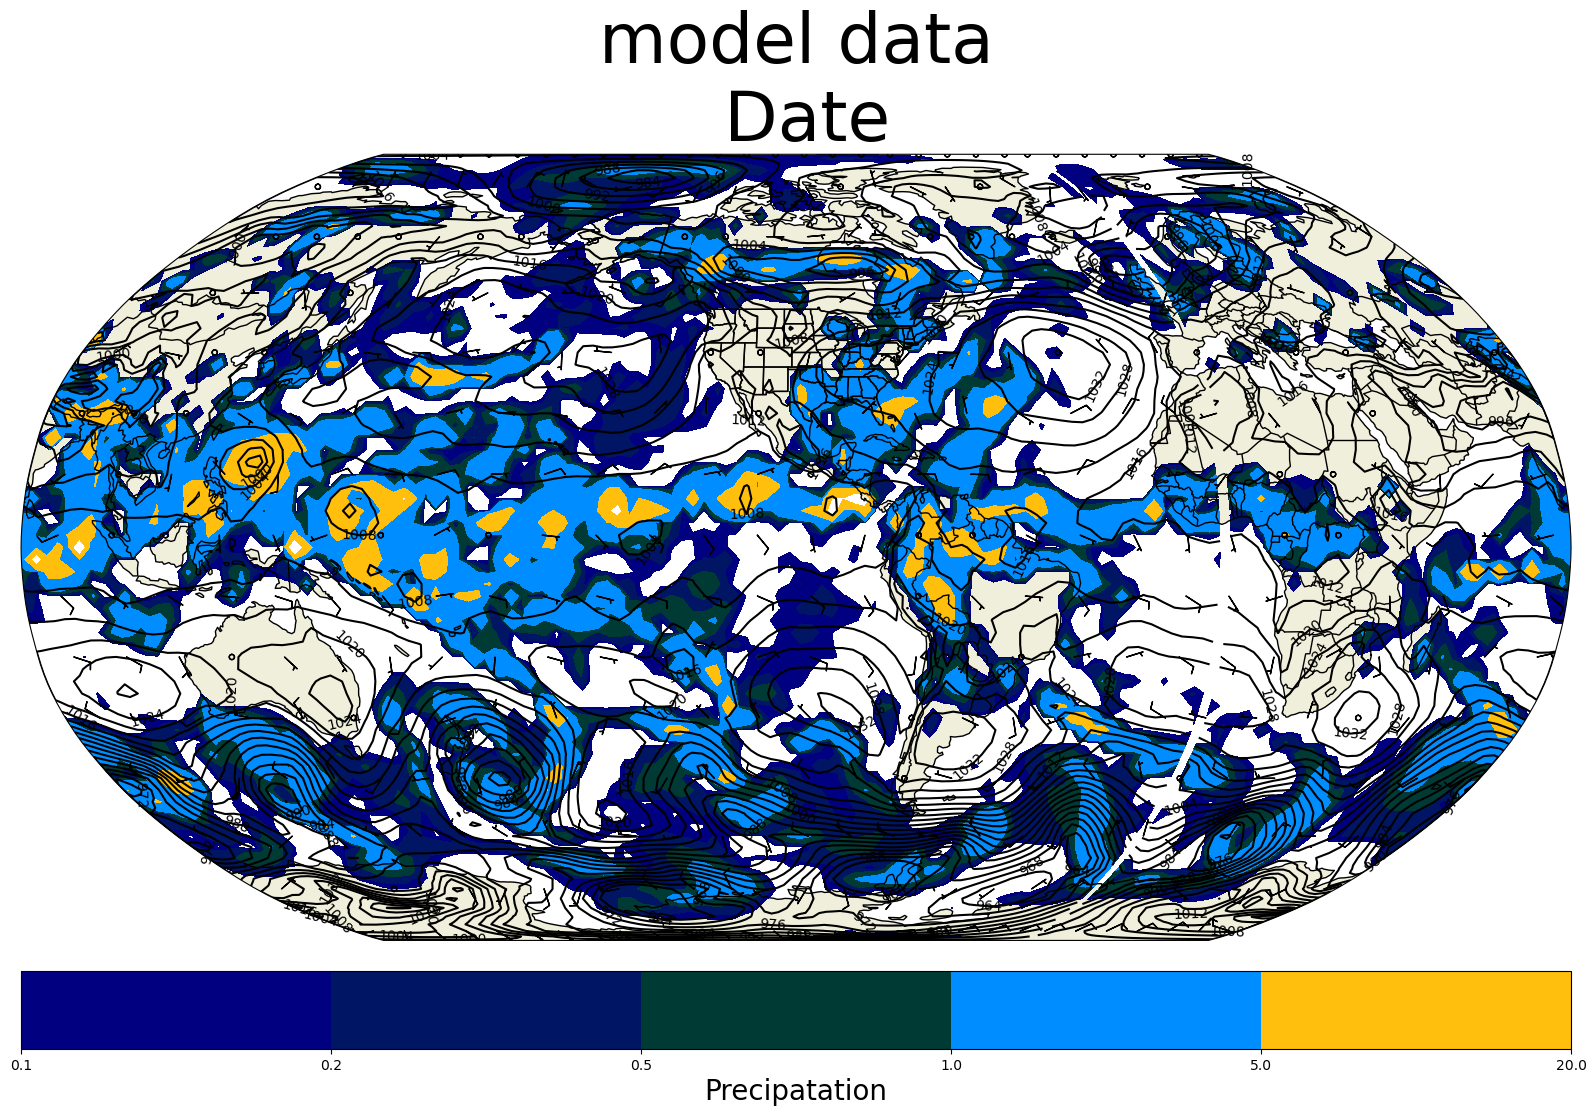

In [95]:
proj =ccrs.Robinson(central_longitude=-101)
#fig size
fig = plt.figure(figsize=(20,20),dpi=100)
ax = plt.axes(projection = proj)
clevs = np.arange(964,1100,4)
#pressure plotting
cs = plt.contour(lon,lat,msl[0],clevs,colors='k',transform =ccrs.PlateCarree())
ax.clabel(cs,inline=True)
#precip ploting
plt.contourf(lon,lat,tp[1],[0.1,0.2,0.5,1,5,20],cmap='gist_ncar',transform=ccrs.PlateCarree())

cb = plt.colorbar(orientation='horizontal',pad=0.02)
cb.set_label('Precipatation',fontsize=20)
plt.barbs(lon[::5],lat[::5],p10u[0,::5,::5],p10v[0,::5,::5],transform =ccrs.PlateCarree(),length=5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
t = plt.title('model data\n Date',fontsize=50)